# 0712 Python / AI Programming Practice

                                                                                    Tutor: Nanyang Ye
                                                                                    Note Taker: Y. Qiu

## Sci-kit-learn-based Machine Learning

    Sci-kit Learn (sklearn) is constructed based on [numpy] and [SciPy].
    [SciPy]: Some mathematic operation in the field of linear algebra and some loss function, e.g. MSE

## Supervised Learning
### Classfication Problem

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds

In [141]:
# Separator

from sklearn.linear_model import SGDClassifier

X, Y = ds.make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)
clf.fit(X, Y)     # change the SGDClassifier to fit the data
                  # Classifier requires Y be either 0 or 1

SGDClassifier(alpha=0.01, max_iter=200)

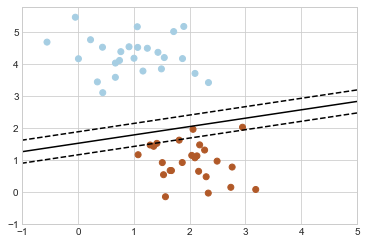

In [142]:
plt.style.use('seaborn-whitegrid')

xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)
X1, X2 = np.meshgrid(xx, yy)         # Decision Space
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):       # ndecnumerate: returns (i,j) and the value
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function(np.array([x1,x2]).reshape(1,-1))
    Z[i, j] = p[0]

levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'

ax = plt.axes()
ax.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

ax.axis('tight')

plt.show()

### Regression

In [39]:
# Data Creator

a = 0.5
b = 1.0

x = 30 * np.random.random(20)
y = a * x + b + np.random.uniform(-5,5,size=x.shape)

In [48]:
from sklearn.linear_model import LinearRegression

rgs = LinearRegression()
rgs.fit(x[:,None], y)


LinearRegression()

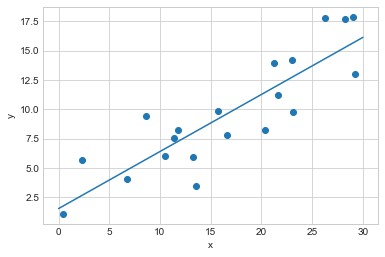

In [50]:
x_new = np.linspace(0, 30, 100)
y_new = rgs.predict(x_new[:, None])

ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.show()

In [31]:
# Why need to clf.fit(x[,None], y)?
# <Estimator>.fit(x, y) required a 2-d x and a 1-d y

trial_x = np.asarray([1,3,5,2,33,4543])
trial_x[:, None]           # convert a 1-d array into 2-d array

array([[   1],
       [   3],
       [   5],
       [   2],
       [  33],
       [4543]])

### Clustering: KNN

In [63]:
# 导入 sklearn
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split           # divide set into training set and test set
from sklearn.metrics import accuracy_score
import pandas as pd

# 加载数据
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = datasets.load_iris()

# 查看iris原始数据
print(pd.DataFrame(iris.data, columns=iris.feature_names).head())
print(iris.target)

# 划分训练集与测试集
X, y = iris.data[:, :2], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

# 数据预处理
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 创建模型
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
# 模型拟合
knn.fit(X_train, y_train)

# 预测
y_pred = knn.predict(X_test)
# 评估
accuracy_score(y_test, y_pred)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


0.631578947368421

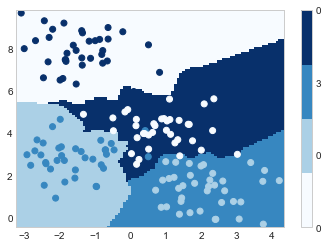

In [176]:
# Another example of clustering (utilizing KNN)

from sklearn.neighbors import KNeighborsClassifier as KNN

N = 4
X, Y = ds.make_blobs(n_samples=150, centers=N, random_state=0, cluster_std=0.90)

knn = KNN(n_neighbors=3)          # here, n-neighbor is a hyperparameter
knn.fit(X, Y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.get_cmap('Blues_r',np.ceil(N/2)*2), shading='auto')

formatter = plt.FuncFormatter(lambda i, *args: Y[int(i)])
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.get_cmap('Blues',np.ceil(N/2)*2))
plt.colorbar(ticks=[0, 1, 2, 3, 4], format=formatter)


plt.show()

### Data Preprocessing

Notice that sklearn has toy data embedded, e.g. iris, Boston Housing Price, MNIST, ... Also has data creator embedded.

    Data Set -- Training Set / Test Set / Validation Set
    in case of overfitting prob. (noise learned)
    
#### An Example

In [85]:
from sklearn.datasets import load_iris
iris = load_iris()
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])
print(iris.data.shape)
print(iris.target.shape)
print(iris.target_names)

(150, 4)
[5.1 3.5 1.4 0.2]
(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']


In [86]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [92]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Text(0, 0.5, 'sepal width (cm)')

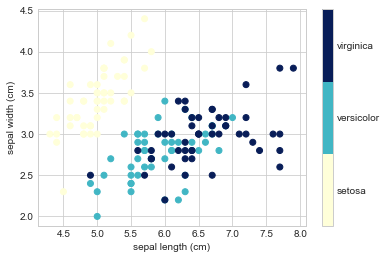

In [111]:
print(iris.target)

import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# 这段代码使用iris的名字来标注颜色条(colorbar)
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('YlGnBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

#### One Hot Encoding
    A vector: [(Is A?), (Is B?), ... , (Is X?)]
    There would be exactly one "1" in label vector, i.e. "one-hot".

#### Binarized
    [0,1]
    
#### Normalized
    min-max scaled

In [96]:
import numpy as np
from sklearn import preprocessing
input_data = np.array([[2.1, -1.9, 5.5],
                       [-1.5, 2.4, 3.5],
                       [0.5, -7.9, 5.6],
                       [5.9, 2.3, -5.8]])

# 二值化
data_binarized = preprocessing.Binarizer(threshold = 0.5).transform(input_data)     # datum == threshold: regarded as "0"
print("\nBinarized data:\n", data_binarized)

#最大最小缩放
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print ("\nMin max scaled data:\n", data_scaled_minmax)


Binarized data:
 [[1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]

Min max scaled data:
 [[0.48648649 0.58252427 0.99122807]
 [0.         1.         0.81578947]
 [0.27027027 0.         1.        ]
 [1.         0.99029126 0.        ]]


#### Data Set Splitting

In [103]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split 

iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target
print(X.shape, y.shape)
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=12, stratify=y, test_size=0.3)
#X_train, X_valid, y_train, y_valid =  train_test_split(X_train, y, random_state=12, stratify=y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 2) (150,)
(105, 2) (45, 2) (105,) (45,)


In [101]:
# Separator

from sklearn.linear_model import LinearRegression

X, Y = ds.make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

rgs = LinearRegression()
rgs.fit(X, Y)     # change the SGDClassifier to fit the data
                  # Classifier requires Y be either 0 or 1
    
print(rgs.coef_)          # W
print(rgs.intercept_)     # b

rgs.predict([[23,30,]])

[ 0.03198458 -0.25953224]
1.1335918051240883


array([-5.91673012])

In [110]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split           # divide set into training set and test set
from sklearn.metrics import accuracy_score
import pandas as pd

# 加载数据
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = datasets.load_iris()

# 划分训练集与测试集
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

# 数据预处理
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 创建模型
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
# 模型拟合
knn.fit(X_train, y_train)

print(iris.target_names[knn.predict([[3,5,4,2],])])         # Category Classification
print(knn.predict_proba([[3,5,4,2],]))                      # Category Probability Classification

['virginica']
[[0. 0. 1.]]


(4.180808080808081, 8.019191919191918, 1.8868686868686868, 4.513131313131313)

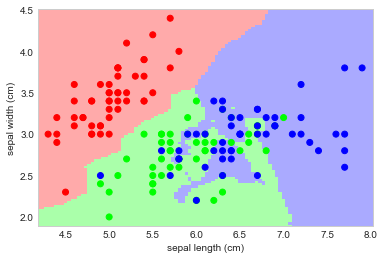

In [128]:
import pylab as pl

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                        # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Z = Z.reshape(xx.shape)
pl.figure()
pl.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
pl.xlabel('sepal length (cm)')
pl.ylabel('sepal width (cm)')
pl.axis('tight')


### Random Forest

In [195]:
# Data Creator

a = 0.5
b = 1.0

X = 30 * np.random.random(20)
y = a * X + b + np.random.uniform(-5,5,size=X.shape)

In [200]:
from sklearn.linear_model import LinearRegression

rgs = LinearRegression()
rgs.fit(X[:,None], y)

X_fit = np.linspace(0, 30, 100)[:, None]
y_fit_linear = rgs.predict(X_fit)

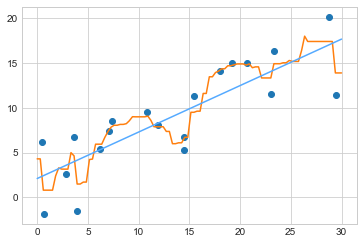

In [218]:
# 训练一个随机森林(Random Forest)模型
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X[:,np.newaxis], y)

# 画出数据和模型预测之间的图形
X_fit = np.linspace(0, 30, 100)[:, np.newaxis]    # np.newaxis == None, introducing a new axis into the array (dimension++).
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit)
plt.plot(X_fit.squeeze(), y_fit_linear, color = '#55AAFF')

## Unsupervised Learning
### Dimension Descend (PCA)

Reduced dataset shape: (150, 2)


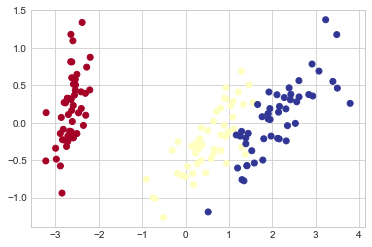

Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


In [227]:
X, y = iris.data, iris.target
DimReq = 2                       # Dimension Required

from sklearn.decomposition import PCA
pca = PCA(n_components=DimReq)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

import matplotlib.pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='RdYlBu')
plt.show()
print("Meaning of the %d components:" % DimReq)

for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, iris.feature_names)))

### Clustering: K-Means

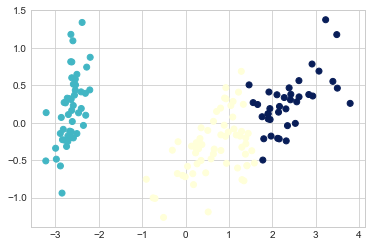

In [232]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='YlGnBu_r')

plt.show()

## Validation
### Confusion Matrix (混淆矩阵)

       ---------   Guessed Categories
    Real Categories   [#(label=R.C and pred = G.C.)]

In [240]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=3)

X_train, X_test, y_train, y_test = train_test_split(X, y)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)

print(conf)

[[15  0  0]
 [ 0 13  1]
 [ 0  0  9]]


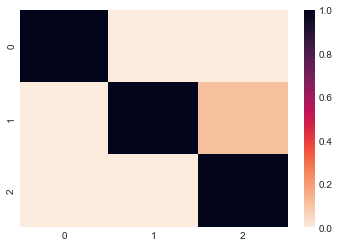

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns


conf_scaled = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(conf)
sns.heatmap(conf_scaled, cmap="rocket_r")
plt.show()